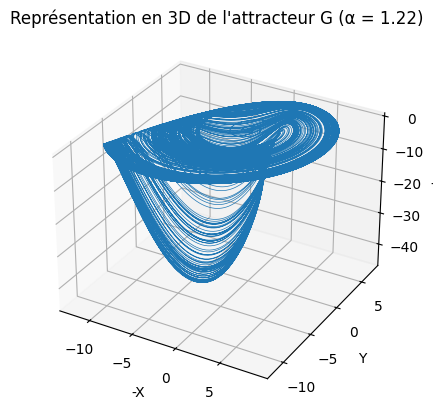

In [55]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def rossler_attractor(t, u, alpha):
    x, y, z = u
    a = 0.2 + 0.09 * alpha
    b = 0.2 - 0.06 * alpha
    c = 5.7 - 1.18 * alpha

    x_dot = -y - z
    y_dot = x + a * y
    z_dot = b + z * (x - c)

    return [x_dot, y_dot, z_dot]

# Paramètres
alpha = 1.22
initial_conditions = [0.1, 0.0, 0.0]
t_span = (0, 1000)
num_points = 100000

# Résoudre les équations différentielles
sol = solve_ivp(rossler_attractor, t_span, initial_conditions, args=(alpha,), t_eval=np.linspace(t_span[0], t_span[1], num_points))

# Visualisation en 3D de l'attracteur chaotique
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(-sol.y[0], sol.y[1], -sol.y[2], lw=0.5)
ax.set_xlabel('-X')
ax.set_ylabel('Y')
ax.set_zlabel('-Z')
ax.set_title("Représentation en 3D de l'attracteur G (α = 1.22)")

plt.show()

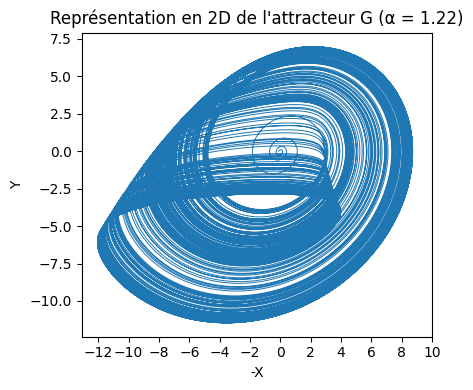

In [53]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

def rossler_attractor(t, u, alpha):
    x, y, z = u
    a = 0.2 + 0.09 * alpha
    b = 0.2 - 0.06 * alpha
    c = 5.7 - 1.18 * alpha

    dx_dt = -y - z
    dy_dt = x + a * y
    dz_dt = b + z * (x - c)

    return [dx_dt, dy_dt, dz_dt]

# Paramètres
alpha = 1.22
initial_conditions = [0.1, 0, 0]
t_span = (0, 1000)
num_points = 100000

# Résoudre les équations différentielles
sol = solve_ivp(rossler_attractor, t_span, initial_conditions, args=(alpha,), t_eval=np.linspace(t_span[0], t_span[1], num_points))

# Visualisation en 3D de l'attracteur chaotique
fig = plt.figure(figsize=(12, 4))

# 2D projection X-Y
ax1 = fig.add_subplot(131)
ax1.plot(-sol.y[0], sol.y[1], lw=0.7)
ax1.set_xlabel('-X')
ax1.set_ylabel('Y')
ax1.set_title("Représentation en 2D de l'attracteur G (α = 1.22)")

# Set x-axis points from -12 to 10 with an interval of 2
ax1.set_xticks(np.arange(-12, 12, step=2))

plt.tight_layout()
plt.show()